In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('funda_train.csv')

In [5]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [6]:
train.columns

Index(['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business',
       'amount'],
      dtype='object')

In [7]:
train.describe()

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


In [8]:
train.dtypes

store_id              int64
card_id               int64
card_company         object
transacted_date      object
transacted_time      object
installment_term      int64
region               object
type_of_business     object
amount              float64
dtype: object

In [9]:
len(train)

6556613

In [10]:
train.shape

(6556613, 9)

In [11]:
train['transacted_date'].max()

'2019-02-28'

### 2019년 3월 1일부터 2019년 5월 31일까지 상점별 매출 예측하기
### 2018년 3월 1일부터 2018년 5월 31일까지 상점별 매출액

In [12]:
train[train['transacted_date'] >= '2018-03-01'].head(1)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
2938,0,855,a,2018-03-01,10:21,0,NaN,기타 미용업,1857.142857


In [13]:
train[train['transacted_date'] <= '2018-05-31'].tail(1)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
6553479,2136,2974530,c,2018-05-31,23:49,0,제주 제주시,기타 주점업,5571.428571


In [14]:
train_2018_0305 = train[(train['transacted_date'] >= '2018-03-01') & (train['transacted_date'] <= '2018-05-31')]

In [15]:
# 상점별 합계
submission = train_2018_0305.groupby('store_id')['amount'].sum()

In [16]:
# CSV 로 저장하기
submission.to_csv('submission.csv')

C:\Users\Minju\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [17]:
%matplotlib inline

In [18]:
train = train.reset_index()

In [19]:
transaction_day = train.groupby(['transacted_date']).agg({'index': 'size', 'amount': 'sum'}).reset_index()

In [20]:
transaction_day.head()

,transacted_date,index,amount
0,2016-06-01,4789,6.520140e+07
1,2016-06-02,4953,5.711538e+07
2,2016-06-03,5122,5.513237e+07
3,2016-06-04,5544,5.592585e+07
4,2016-06-05,4060,3.591438e+07


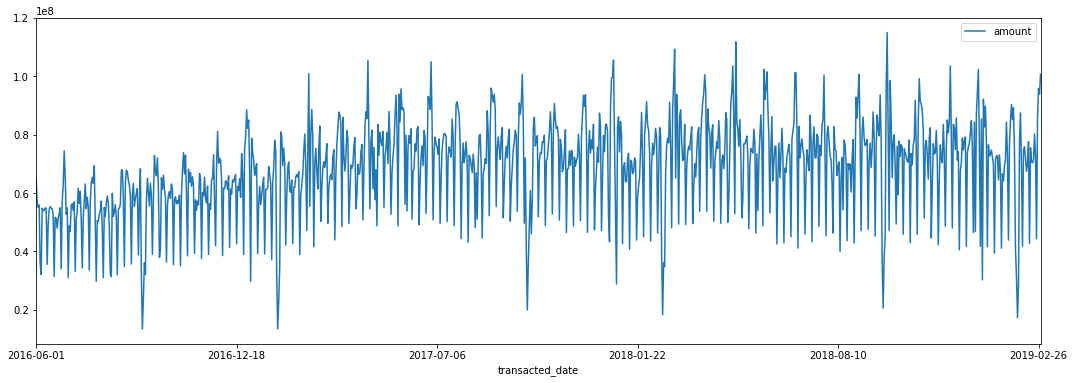

In [21]:
transaction_day.plot(x = 'transacted_date', y = 'amount', figsize = (18, 6))

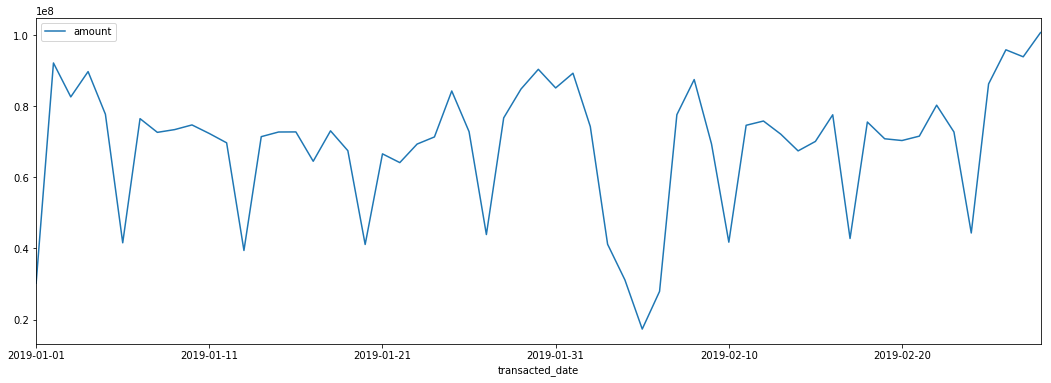

In [22]:
transaction_day.set_index('transacted_date').loc['2019-01-01':,:].plot(y = 'amount', figsize = (18, 6))

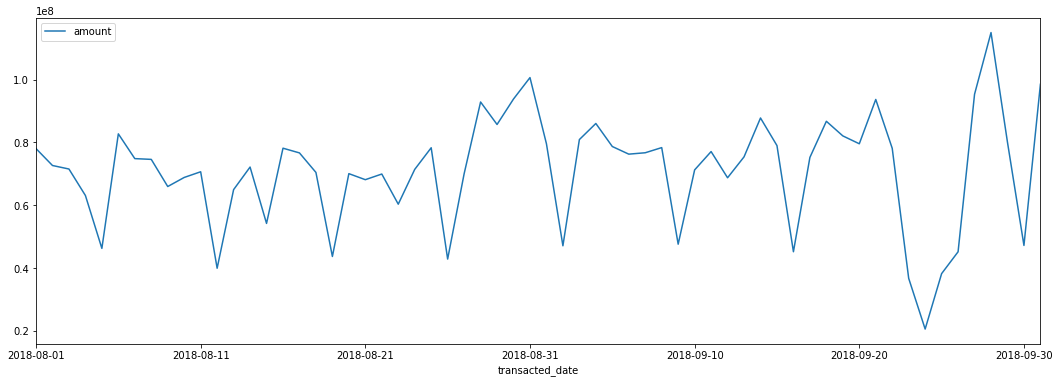

In [23]:
transaction_day.set_index('transacted_date').loc['2018-08-01':'2018-10-01'].plot(y = 'amount', figsize = (18, 6))

In [24]:
train['transacted_date_month'] = train['transacted_date'].apply(lambda x: x[:7])

In [25]:
train_groupby_month = train.groupby(['transacted_date_month'])['amount'].sum()

In [26]:
import matplotlib.pyplot as plt

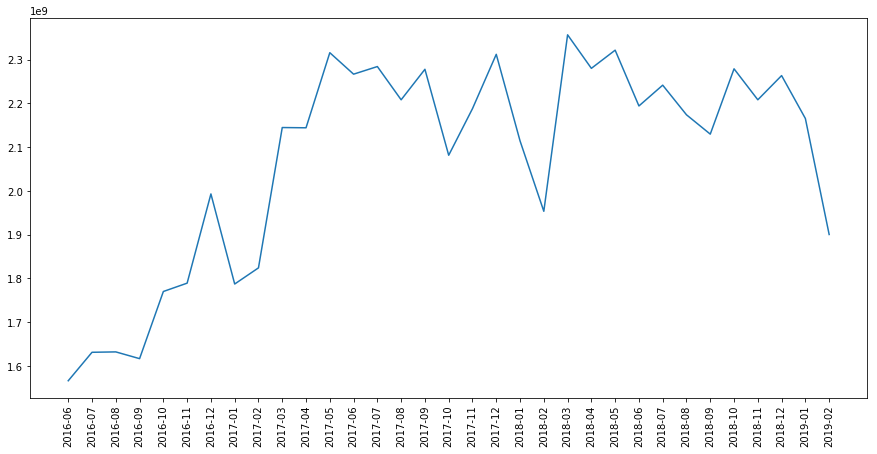

In [27]:
plt.figure(figsize=(15,7))
plt.plot(train_groupby_month)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
train['transacted_date'] = pd.to_datetime(train['transacted_date'])

In [29]:
train.dtypes

index                             int64
store_id                          int64
card_id                           int64
card_company                     object
transacted_date          datetime64[ns]
transacted_time                  object
installment_term                  int64
region                           object
type_of_business                 object
amount                          float64
transacted_date_month            object
dtype: object

In [30]:
train['transacted_year'] = train['transacted_date'].dt.year
train['transacted_month'] = train['transacted_date'].apply(lambda x: x.month)

In [31]:
train.head(1)

,index,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,transacted_date_month,transacted_year,transacted_month
0,0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016-06,2016,6


In [32]:
train_pivoted = train.pivot_table(index='transacted_month', columns='transacted_year', values='amount')

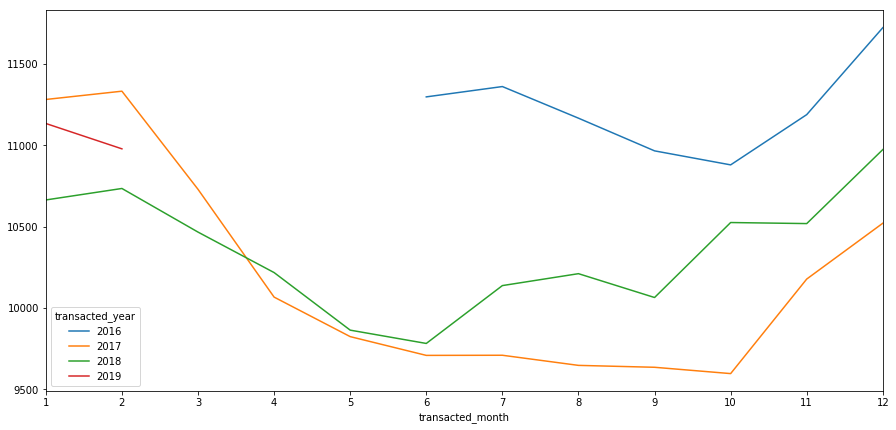

In [33]:
train_pivoted.plot(figsize = (15, 7))
plt.xticks([i+1 for i in list(range(12))])
plt.show()

In [34]:
# 그래프에서 한글 보이게 하기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()
rc('font', family=font_name)

In [35]:
# 총 매출 큰 순서로 끊어서 걔네만 따로 보기

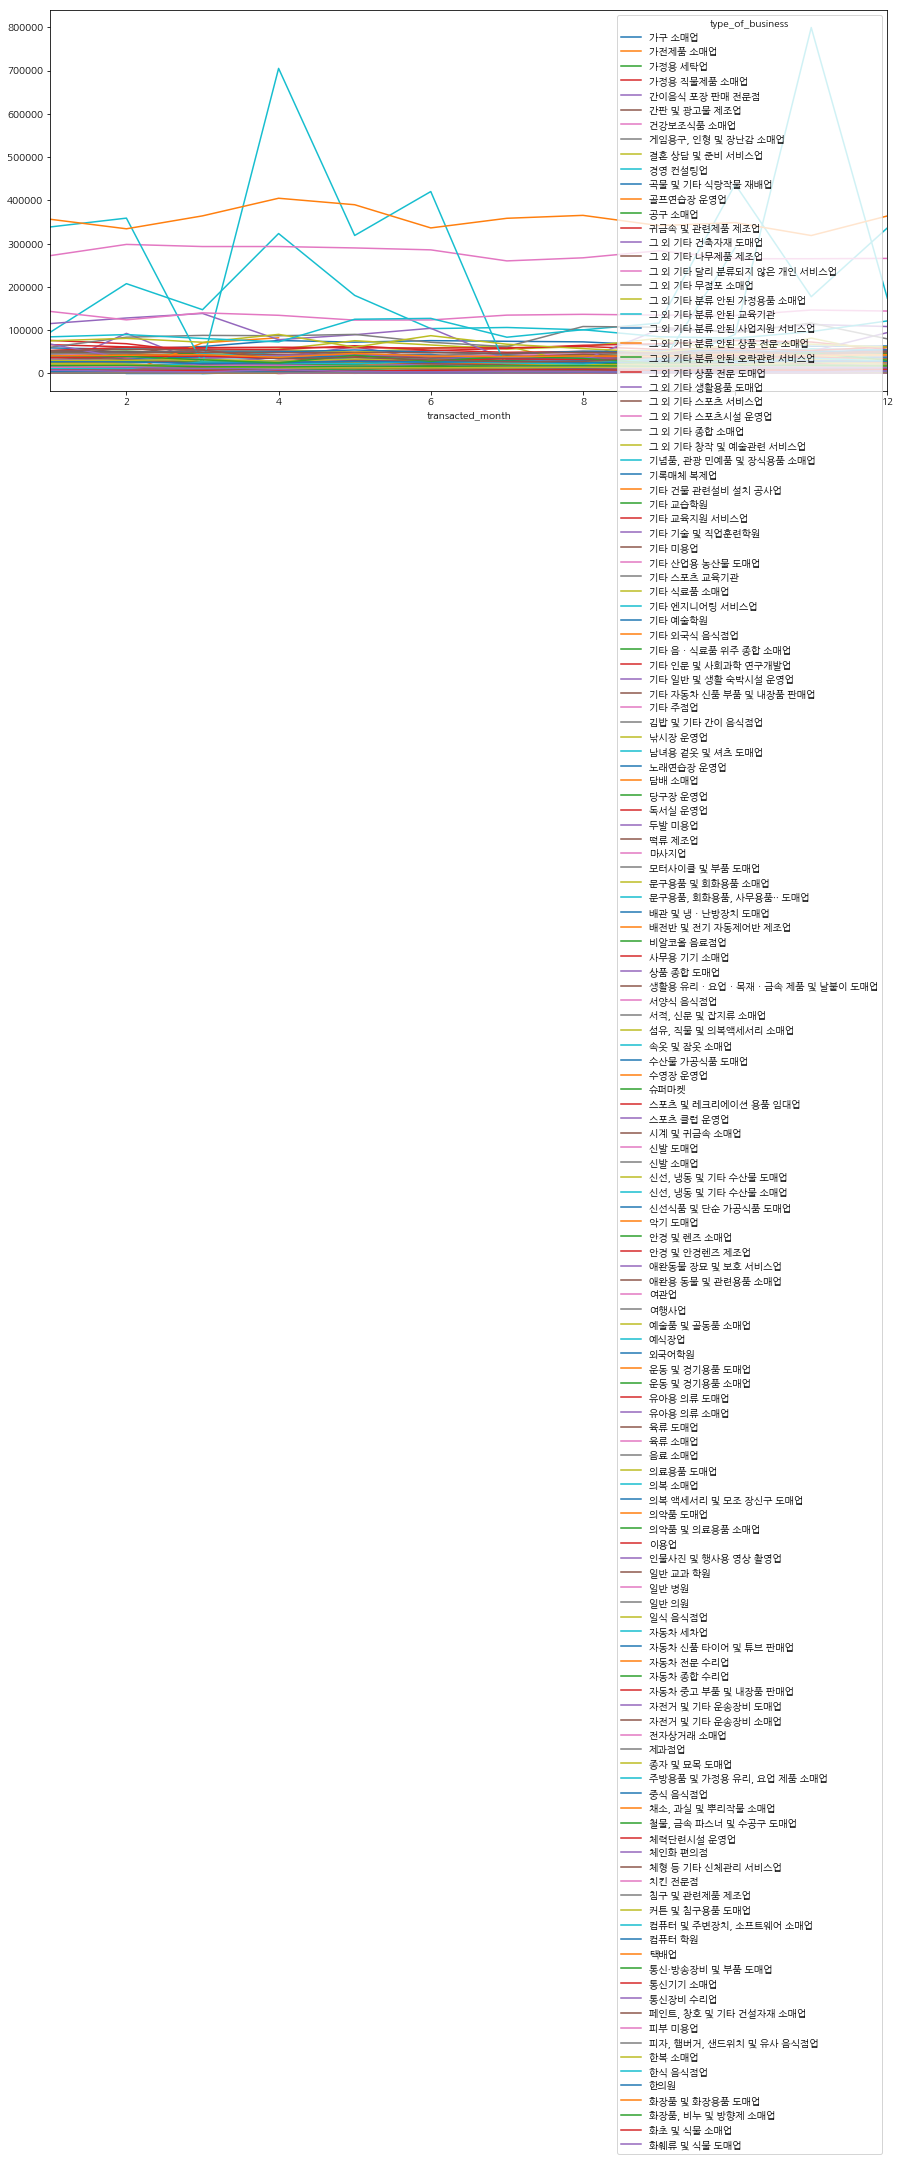

In [36]:
train_pivoted2 = train.pivot_table(index='transacted_month', columns='type_of_business', values='amount')
train_pivoted2.plot(figsize = (15, 7))
# plt.xticks([i+1 for i in list(range(12))])
plt.show()

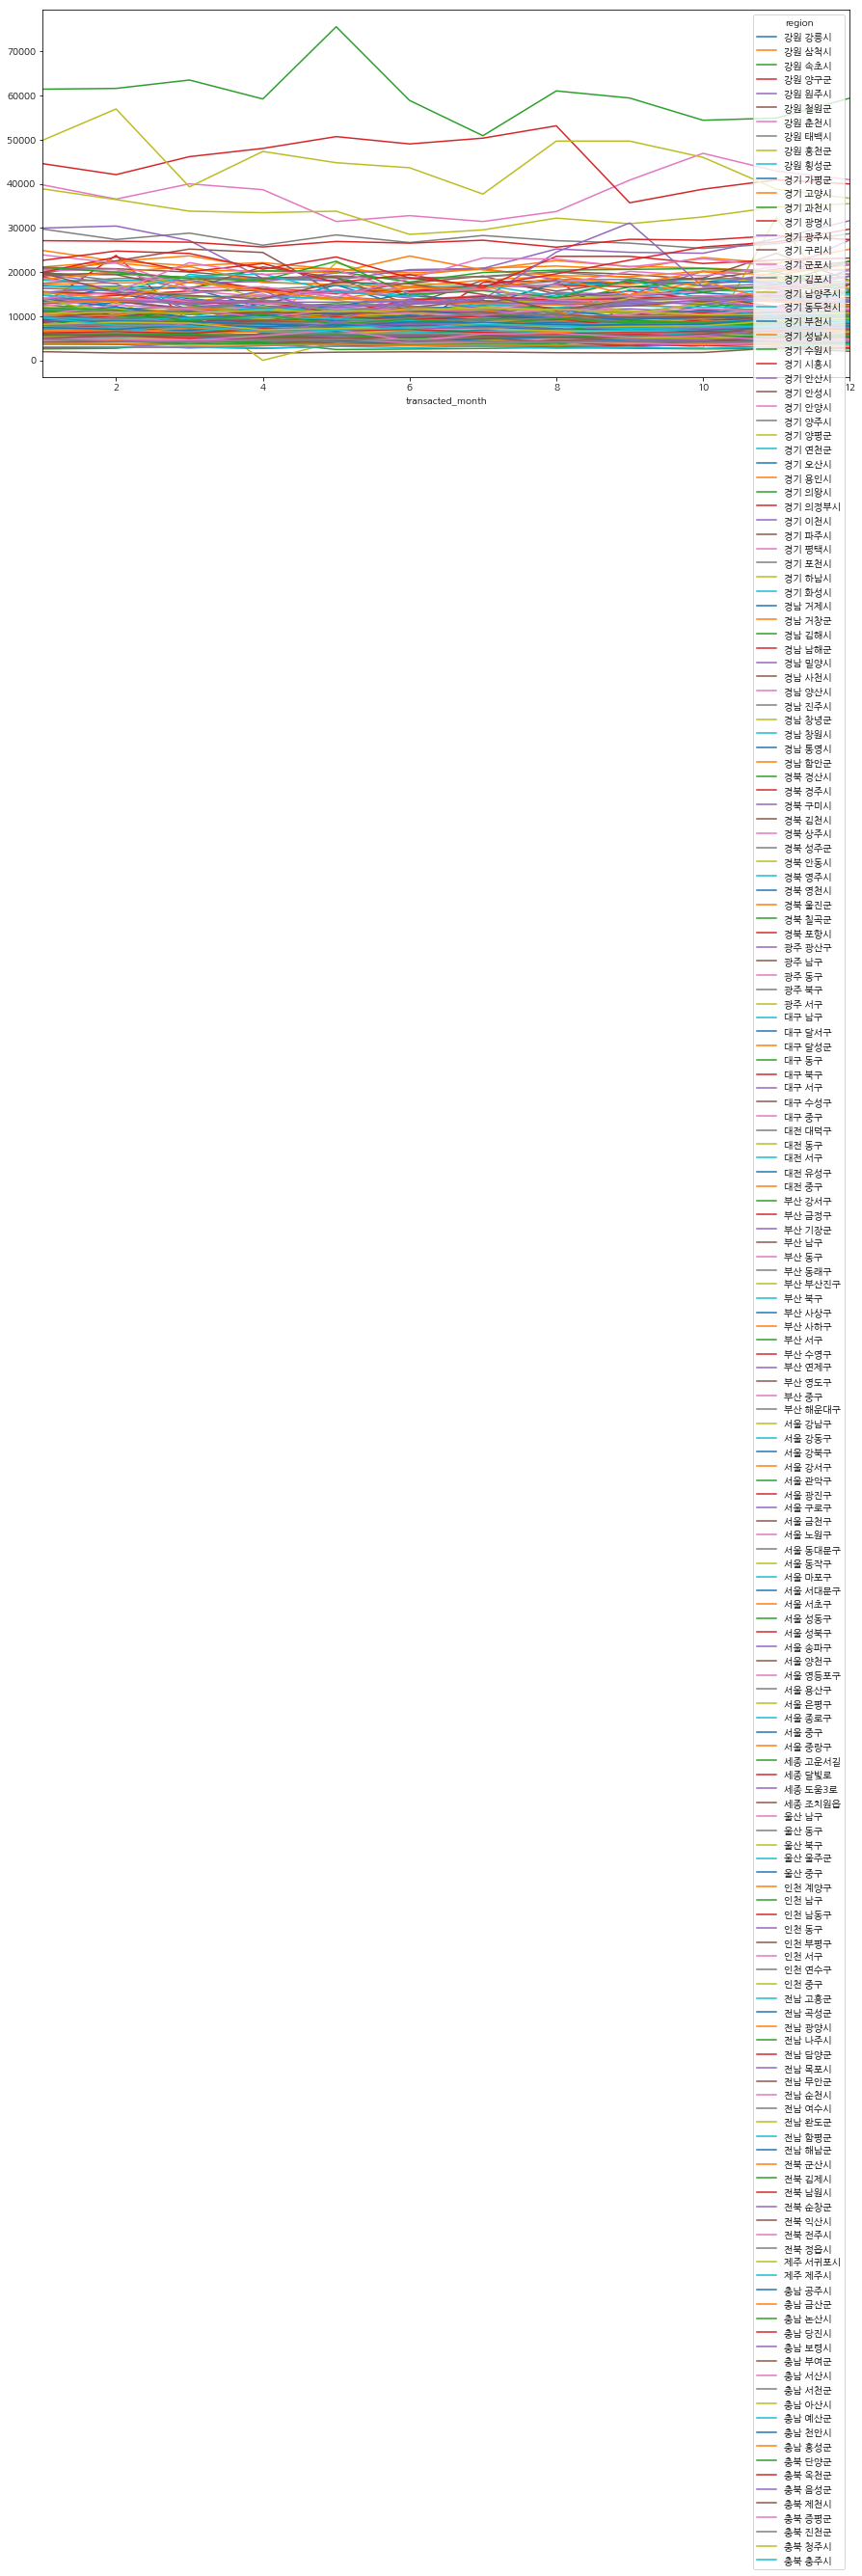

In [37]:
train_pivoted3 = train.pivot_table(index='transacted_month', columns='region', values='amount')
train_pivoted3.plot(figsize = (15, 7))
# plt.xticks([i+1 for i in list(range(12))])
plt.show()

In [38]:
# 탭으로 컬럼 나누기?
# train['region_up_scale'] = train['region'][0:2]
train['region'][0:2]

0    NaN
1    NaN
Name: region, dtype: object

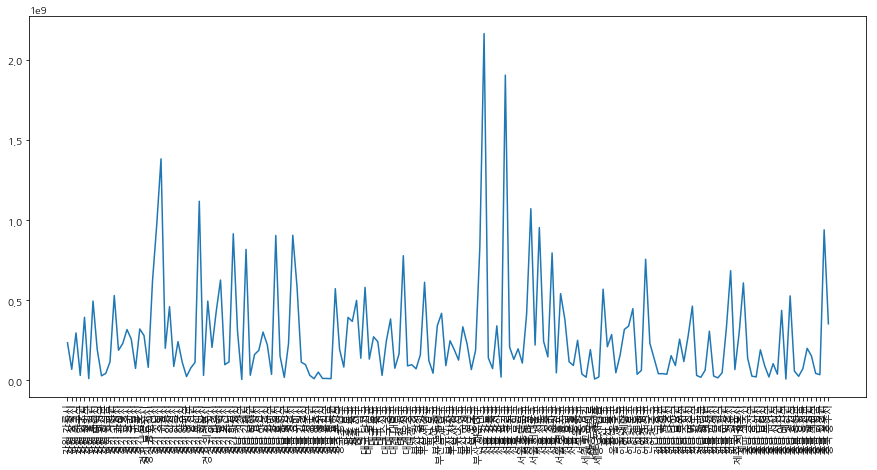

In [39]:
train_groupby_region = train.groupby(['region'])['amount'].sum()
plt.figure(figsize=(15,7))
plt.plot(train_groupby_region)
plt.xticks(rotation='vertical')
plt.show()

### 1. 2019년 1월부터 2월까지 매출의 합 / 59일 * 92일
### 2. 92일동안 월화수목금토일의 갯수를 구해서

In [51]:
train['transacted_date(datetime)'] = pd.to_datetime(train['transacted_date'])

In [71]:
train.dtypes

index                                 int64
store_id                              int64
card_id                               int64
card_company                         object
transacted_date              datetime64[ns]
transacted_time                      object
installment_term                      int64
region                               object
type_of_business                     object
amount                              float64
transacted_date_month                object
transacted_year                       int64
transacted_month                      int64
transacted_date(datetime)    datetime64[ns]
day_of_week                           int64
dtype: object

In [52]:
train['day_of_week'] = train['transacted_date(datetime)'].dt.dayofweek

In [53]:
train['day_of_week'].head()

0    2
1    2
2    2
3    2
4    3
Name: day_of_week, dtype: int64

In [55]:
train190102 = train[train['transacted_date'] > '2019-01-01']

In [57]:
train190102['day_of_week'].value_counts()

5    60572
3    58889
4    57675
2    55334
0    45536
1    45486
6    39889
Name: day_of_week, dtype: int64

### 92일이 몇 주인지 확인
### 모든 요일은 13번 반복, 요일4(금요일)만 14번

In [83]:
import datetime
print(datetime.datetime(2019, 3, 1).weekday())
print(datetime.datetime(2019, 5, 31).weekday())

4
4


In [85]:
92 // 7

13

### 2019-01-01 은 화요일부터 시작, 8주 + 화(1), 수(2), 목(3)

In [89]:
datetime.datetime(2019, 1, 1).weekday()

1

In [87]:
59 // 7

8

In [88]:
59 % 7

3

In [102]:
# 선미님 팁
# 날짜 생성
# .astype('str')문자열로 바꾼다
dates = list(pd.date_range(start='20190301', end='20190531'))

In [107]:
dates_df = pd.DataFrame(dates)
dates_df.columns = ['future']
dates_df.head()

,future
0,2019-03-01
1,2019-03-02
2,2019-03-03
3,2019-03-04
4,2019-03-05


In [109]:
dates_df['weekday'] = dates_df['future'].dt.weekday

In [113]:
dates_df['weekday'].value_counts()

4    14
6    13
5    13
3    13
2    13
1    13
0    13
Name: weekday, dtype: int64

### 59일간 상점별, 요일별 매출합
- 59일: 1,2,3: 9번, 4~0: 8번
- 92일: 4: 14번, 나머지: 13번

In [119]:
temp = train190102.groupby(['store_id', 'day_of_week'])['amount'].sum().reset_index().head()

In [159]:
# store_id 별, 요일별 매출을 각각 구한다
# 과거 59일 동안 해당 요일이 반복되는 횟수를 나눈다 -> train190102 에서 행 추가해서 나눈 값 열 추가
# 미래 92일 동안 해당 요일이 반복되는 횟수를 곱한다 -> 마찬가지로 열 추가
# 모든 요일의 매출을 더한다 -> 여기서부터 for 문 사용
# store_id 와 총 매출을 List 로 저장한다
# List 로 저장한 값을 DataFrame 에 행으로 저장한다

df = pd.DataFrame(columns = ['store_id', 'amount'])
for i in temp['store_id']:
    store_amount_total = 0
    df_append = []
    for day in range(0, 7):
        if day in [1, 2, 3]:
            amount = temp[temp[temp['store_id'] == %s]['day_of_week'] == %s]['amount']/9 % (i, day)
            amount = amount*13
        else:
            amount = temp[temp[temp['store_id'] == %s]['day_of_week'] == %s]['amount']/8 % (i, day)
            if day == 4:
                amount = amount*14
            else:
                amount = amount*14
        store_amount_total += amount
        df_append = [%s, store_amount_total] % i

SyntaxError: invalid syntax (<ipython-input-159-f04b54137f9c>, line 7)

### 과거 요일별 amount 를 일단위로 계산

In [166]:
train190102.loc[train190102['day_of_week'] == 0, 'amount_by_day'] = train190102['amount'] / 8
train190102.loc[train190102['day_of_week'] == 1, 'amount_by_day'] = train190102['amount'] / 9
train190102.loc[train190102['day_of_week'] == 2, 'amount_by_day'] = train190102['amount'] / 9
train190102.loc[train190102['day_of_week'] == 3, 'amount_by_day'] = train190102['amount'] / 9
train190102.loc[train190102['day_of_week'] == 4, 'amount_by_day'] = train190102['amount'] / 8
train190102.loc[train190102['day_of_week'] == 5, 'amount_by_day'] = train190102['amount'] / 8
train190102.loc[train190102['day_of_week'] == 6, 'amount_by_day'] = train190102['amount'] / 8

In [167]:
train190102[['day_of_week', 'amount', 'amount_by_day']] .head()

,day_of_week,amount,amount_by_day
4241,3,11428.571429,1269.841270
4242,3,2142.857143,238.095238
4243,3,2142.857143,238.095238
4244,3,2142.857143,238.095238
4245,3,571.428571,63.492063


### 요일별 미래 매출 계산

In [169]:
train190102.loc[train190102['day_of_week'] == 0, 'amount_future'] = train190102['amount_by_day'] * 13
train190102.loc[train190102['day_of_week'] == 1, 'amount_future'] = train190102['amount_by_day'] * 13
train190102.loc[train190102['day_of_week'] == 2, 'amount_future'] = train190102['amount_by_day'] * 13
train190102.loc[train190102['day_of_week'] == 3, 'amount_future'] = train190102['amount_by_day'] * 13
train190102.loc[train190102['day_of_week'] == 4, 'amount_future'] = train190102['amount_by_day'] * 14
train190102.loc[train190102['day_of_week'] == 5, 'amount_future'] = train190102['amount_by_day'] * 13
train190102.loc[train190102['day_of_week'] == 6, 'amount_future'] = train190102['amount_by_day'] * 13

In [170]:
train190102[['day_of_week', 'amount', 'amount_by_day', 'amount_future']] .head()

,day_of_week,amount,amount_by_day,amount_future
4241,3,11428.571429,1269.841270,16507.936508
4242,3,2142.857143,238.095238,3095.238095
4243,3,2142.857143,238.095238,3095.238095
4244,3,2142.857143,238.095238,3095.238095
4245,3,571.428571,63.492063,825.396825


### groupby 해서 상점별 미래 매출 계산

In [181]:
predict_by_190102 = train190102.groupby('store_id')['amount_future'].sum().reset_index()

In [193]:
predict_by_190102.head()

,store_id,amount_future
0,0,1.900873e+06
1,1,3.494077e+05
2,2,1.457119e+06
3,4,2.861393e+06
4,5,8.371492e+05


### 빠진 상점 추가하기

In [175]:
train['store_id'].nunique()

1967

In [176]:
train190102['store_id'].nunique()

1944

In [228]:
missing_id = list(set(train['store_id']) - set(train190102['store_id']))

In [229]:
len(predict_by_190102)

1944

In [230]:
missing_id_df = pd.DataFrame(missing_id, columns = ['store_id'])

In [231]:
missing_id_df['amount_future'] = 0

In [232]:
missing_id_df.head()

,store_id,amount_future
0,640,0
1,257,0
2,772,0
3,2053,0
4,1685,0


In [249]:
total_predict = pd.concat([predict_by_190102, missing_id_df], axis=0, ignore_index=True)

In [252]:
total_predict_asc = total_predict.sort_values(by='store_id', ascending=True)

In [256]:
total_predict_asc.head()

,store_id,amount_future
0,0,1.900873e+06
1,1,3.494077e+05
2,2,1.457119e+06
3,4,2.861393e+06
4,5,8.371492e+05


### CSV 파일로 저장

In [257]:
total_predict_asc.to_csv('predict_by_190102.csv')

In [258]:
# 실제 파일에는 없는 값이 생김... 와이
pd.read_csv('predict_by_190102.csv')

,Unnamed: 0,store_id,amount_future
0,0,0,1.900873e+06
1,1,1,3.494077e+05
2,2,2,1.457119e+06
3,3,4,2.861393e+06
4,4,5,8.371492e+05
5,5,6,6.969939e+06
6,6,7,3.019024e+05
7,7,8,3.769087e+06
8,8,9,1.260853e+06
9,9,10,1.863859e+06


### TEST

In [156]:
for i in [1, 2, 3]:
    print(('Hi %a %a') % (i, i))

Hi 1 1
Hi 2 2
Hi 3 3


In [211]:
dd = pd.DataFrame(columns = ['store_id', 'amount'])
dd

,store_id,amount


In [212]:
dd.loc[0] = [3,2]

In [213]:
dd

,store_id,amount
0,3,2


In [201]:
dd.loc[0] = [3,4]

ValueError: Must have equal len keys and value when setting with an iterable